In [4]:
from tf_unet import unet, util, image_util
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
#import scipy
from scipy import misc
%matplotlib inline

In [5]:
masks_dir = sorted(glob.glob("/Users/cesare.chung/int/01_CODE_UNET/NEW/example/*mask.tif"))
imgs_dir = sorted(glob.glob("/Users/cesare.chung/int/01_CODE_UNET/NEW/example/*_img.tif"))


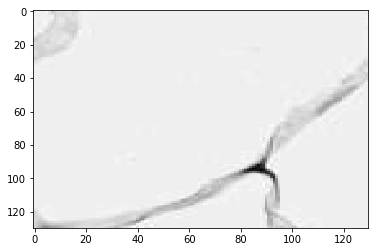

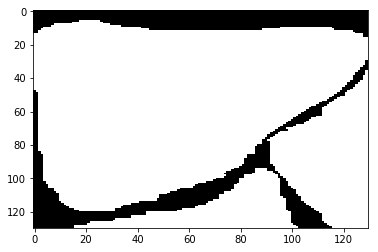

In [6]:
X_data=[]
for index,entry in enumerate(imgs_dir):
    img = misc.imread(entry)
    X_data.append(img)

Y_data=[]
for index,entry in enumerate(masks_dir):
    img = misc.imread(entry)
    Y_data.append(img)

X_data=np.array(X_data)
Y_data=np.array(Y_data)

plt.imshow(X_data[0,...,1], aspect="auto",cmap='gray')
plt.show()
plt.imshow(Y_data[0,...,1], aspect="auto",cmap='gray')
plt.show()

In [7]:
data_provider = image_util.SimpleDataProvider(X_data,Y_data,channels=3, n_class=2)
data_provider.n_class = 2

In [8]:
net = unet.Unet(layers=3, features_root=64, channels=3, n_class=2)

#trainer = unet.Trainer(net)
trainer = unet.Trainer(net, optimizer="adam")


2017-10-28 20:54:27,175 Layers 3, features 64, filter size 3x3, pool size: 2x2


In [9]:

path = trainer.train(data_provider, output_path="out", training_iters=16, epochs=3)


2017-10-28 20:54:37,376 Removing '/Users/cesare.chung/int/01_CODE_UNET/tf_UNET_test/github/prediction'
2017-10-28 20:54:37,378 Removing '/Users/cesare.chung/int/01_CODE_UNET/tf_UNET_test/github/out'
2017-10-28 20:54:37,383 Allocating '/Users/cesare.chung/int/01_CODE_UNET/tf_UNET_test/github/prediction'
2017-10-28 20:54:37,385 Allocating '/Users/cesare.chung/int/01_CODE_UNET/tf_UNET_test/github/out'
2017-10-28 20:54:41,696 Verification error= 5.9%, loss= 171.7308
2017-10-28 20:54:45,997 Start optimization
2017-10-28 20:54:48,065 Iter 0, Minibatch Loss= 141.2851, Training Accuracy= 0.9411, Minibatch error= 5.9%
2017-10-28 20:54:49,987 Iter 1, Minibatch Loss= 84.1766, Training Accuracy= 0.9411, Minibatch error= 5.9%
2017-10-28 20:54:51,895 Iter 2, Minibatch Loss= 84.9218, Training Accuracy= 0.9411, Minibatch error= 5.9%
2017-10-28 20:54:53,809 Iter 3, Minibatch Loss= 431.7711, Training Accuracy= 0.9411, Minibatch error= 5.9%
2017-10-28 20:54:55,736 Iter 4, Minibatch Loss= 2110.3787, Train